Output streaming akan dipotong hingga 5000 baris terakhir.
t: 0.875 s, Suhu rata-rata: 50.00 Celcius
t: 0.875 s, Suhu rata-rata: 50.00 Celcius
t: 0.875 s, Suhu rata-rata: 50.00 Celcius
t: 0.875 s, Suhu rata-rata: 50.00 Celcius
t: 0.876 s, Suhu rata-rata: 50.00 Celcius
t: 0.876 s, Suhu rata-rata: 50.00 Celcius
t: 0.876 s, Suhu rata-rata: 50.00 Celcius
t: 0.876 s, Suhu rata-rata: 50.00 Celcius
t: 0.876 s, Suhu rata-rata: 50.00 Celcius
t: 0.876 s, Suhu rata-rata: 50.00 Celcius
t: 0.876 s, Suhu rata-rata: 50.00 Celcius
t: 0.876 s, Suhu rata-rata: 50.00 Celcius
t: 0.877 s, Suhu rata-rata: 50.00 Celcius
t: 0.877 s, Suhu rata-rata: 50.00 Celcius
t: 0.877 s, Suhu rata-rata: 50.00 Celcius
t: 0.877 s, Suhu rata-rata: 50.00 Celcius
t: 0.877 s, Suhu rata-rata: 50.00 Celcius
t: 0.877 s, Suhu rata-rata: 50.00 Celcius
t: 0.877 s, Suhu rata-rata: 50.00 Celcius
t: 0.877 s, Suhu rata-rata: 50.00 Celcius
t: 0.878 s, Suhu rata-rata: 50.00 Celcius
t: 0.878 s, Suhu rata-rata: 50.00 Celcius
t: 0.878 s, Suhu 

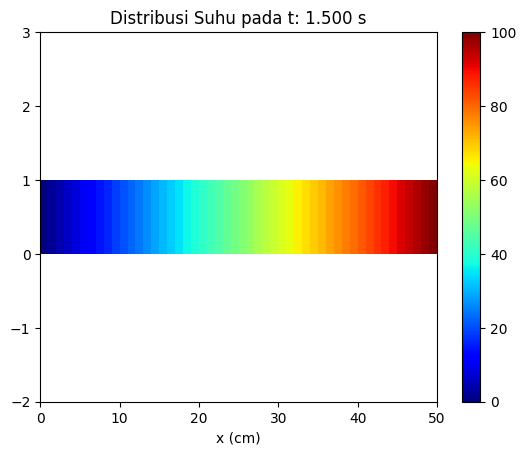

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Mendefinisikan Variabel
a = 500  # Koefisien Difusivitas Termal [m^2/s]
panjang = 2.5  # Panjang plat [m]
waktu = 1.5  # Waktu simulasi [s]
node = 50  # Jumlah titik grid

dx = panjang / node  # Jarak antar titik grid [m]
dt = 0.5 * dx ** 2 / a  # Ukuran waktu simulasi [s]
t_n = int(waktu / dt)  # Jumlah iterasi simulasi
u = np.zeros(node) + 20  # Suhu awal plat [degC]

# Kondisi Batas
u[0] = 0  # Suhu ujung kiri plat [degC]
u[-1] = 100  # Suhu ujung kanan plat [degC]

# Inisialisasi waktu iterasi
counter = 0.001  # Mulai dari 0.001 detik
iteration_step = 50  # Setiap 50 iterasi
time_step = iteration_step * dt  # Waktu antara setiap iterasi

# Simulasi
for i in range(t_n):
    w = u.copy()  # Menyalin data suhu untuk perhitungan
    for j in range(1, node - 1):  # Melooping setiap titik grid kecuali batas
        u[j] = (dt * a * (w[j - 1] - 2 * w[j] + w[j + 1]) / dx ** 2) + w[j]  # Perhitungan

    # Mencetak suhu rata-rata setiap 50 iterasi
    if (i + 1) % iteration_step == 0:
        print("t: {:.3f} s, Suhu rata-rata: {:.2f} Celcius".format(counter, np.mean(u)))

    counter += dt  # Menambah waktu simulasi

    if counter > waktu:  # Berhenti jika sudah mencapai waktu simulasi
        break

# Visualisasi pada t = 1.5s
fig, ax = plt.subplots()
ax.set_xlabel("x (cm)")
pcm = ax.pcolormesh([u], cmap=plt.cm.jet, vmin=0, vmax=100)  # Plot distribusi
plt.colorbar(pcm, ax=ax)
ax.set_ylim([-2, 3])  # Batas skala y

# Memperbarui plot pada t = 1.5s
pcm.set_array([u])
ax.set_title("Distribusi Suhu pada t: {:.3f} s".format(waktu))

plt.show()